In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords

In [ ]:
col_names=["no", "name", "result", "review"]
df1=pd.read_csv("/content/twitter_training.csv.zip",names=col_names)

In [ ]:
df2=pd.read_csv("/content/twitter_validation.csv",names=col_names)

In [ ]:
df1.head()

,no,name,result,review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df2.head()

,no,name,result,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
print(df1.shape)
print(df2.shape)

(74682, 4)
(1000, 4)


In [ ]:
df=pd.concat([df1,df2],ignore_index=True)

In [ ]:
df.shape

(75682, 4)

In [ ]:
df.describe()

,no
count,75682.000000
mean,6432.579583
std,3740.243463
min,1.000000
25%,3196.000000
50%,6423.000000
75%,9602.000000
max,13200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   no      75682 non-null  int64 
 1   name    75682 non-null  object
 2   result  75682 non-null  object
 3   review  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

no          0
name        0
result      0
review    686
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

no        0
name      0
result    0
review    0
dtype: int64

In [27]:
df=df.drop("no",axis=1)

In [28]:
df = df[~df['result'].isin(['Irrelevant'])]

In [29]:
df.head()

,name,result,review
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [32]:
y = df.result

In [33]:
y.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: result, dtype: object

In [34]:
y.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [35]:
mapping = {"Positive": 1,"Neutral":0,"Negative": -1}
y = y.map(mapping)

In [36]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
75675   -1
75676    1
75679    1
75680    1
75681    0
Name: result, Length: 61949, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], y, test_size=0.33, random_state=53)

In [40]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [42]:
pred = nb_classifier.predict(count_test)

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.76      0.86      0.81      7483
           0       0.85      0.67      0.75      6050
           1       0.78      0.82      0.80      6911

    accuracy                           0.79     20444
   macro avg       0.80      0.78      0.79     20444
weighted avg       0.80      0.79      0.79     20444



In [47]:
from matplotlib.pylab import plt
import seaborn as sns

Text(70.72222222222221, 0.5, 'Real Labels')

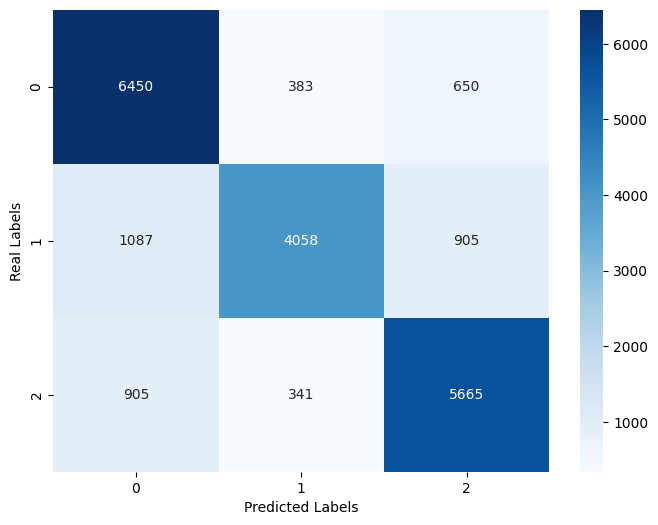

In [56]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(count_train, y_train)

RandomForestClassifier()

In [51]:
pred2 = model.predict(count_test)

In [52]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

          -1       0.93      0.92      0.92      7483
           0       0.95      0.87      0.91      6050
           1       0.88      0.94      0.91      6911

    accuracy                           0.91     20444
   macro avg       0.92      0.91      0.91     20444
weighted avg       0.92      0.91      0.91     20444



Text(70.72222222222221, 0.5, 'Real Labels')

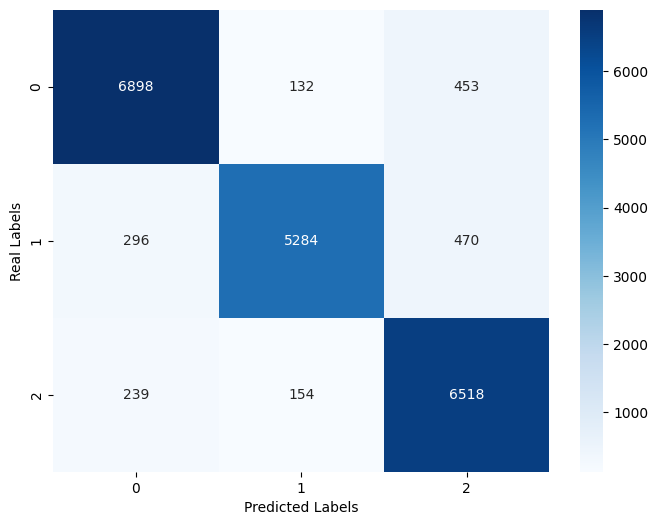

In [53]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')